# Predicting Spotify Playlist Adds 

## Part 2: Exploratory Data Analysis 

This notebook imports the datasets collected in Part 1 and performs exploratory data analysis; seeing if there are any meaningfu relationships or patterns in the features. Essentially, we want to get a better understanding of our data and what we're working with.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

from ast import literal_eval

#load both datasets
user_1 = pd.read_csv('data/user_1.csv') 
user_2 = pd.read_csv('data/user_2.csv')
user_1_artist_info = pd.read_csv('data/user_1_artist_info.csv')
user_2_artist_info = pd.read_csv('data/user_2_artist_info.csv')

In [2]:
user_1.head()

track_id             track_name             artist_name  \
0  0sR0deixp6xTZ5Yx9g0pr0             Release Me         ['Miette Hope']   
1  0doiRAg2YNQvamY6oMPwkw  Dancing in the Street         ['Stephen Day']   
2  0NuIfPuBhUAt4aA4HP0rUu    You Seemed so Happy  ['The Japanese House']   
3  5EXD5rXJ4IVb8g4xSwT0fc   If You Were the Rain         ['Stephen Day']   
4  68ViVsxqymVrKMnAbVsEhU           Talking Slow        ['Dylan Jordan']   

                    artist_id release_date album_type  popularity  \
0  ['4K61UysqQc1VRj8VsY76Qw']   2018-06-22     single          34   
1  ['4cnFw4bkIWVGKUBsr93OS5']   2018-04-27     single           4   
2  ['3IunaFjvNKj98JW89JYv9u']   2019-03-01      album          53   
3  ['4cnFw4bkIWVGKUBsr93OS5']   2016-04-08     single          47   
4  ['0vQwQkQbLxrapE7TG9o5SB']   2018-12-12     single          48   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.517   0.480   11    -7.944     0       0.0425        0.6830   
1         0.632   0.677   11    -8.105     1       0.0911        0.2630   
2         0.519   0.888   11    -6.232     1       0.1170        0.0406   
3         0.481   0.412    9    -8.413     1       0.0401        0.6110   
4         0.501   0.533    2   -10.110     1       0.0379        0.2020   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000000    0.0760    0.539  134.012       212236               4  
1          0.000010    0.0977    0.512  119.763       199027               4  
2          0.000000    0.2270    0.416  149.938       162486               4  
3          0.000059    0.0998    0.326   84.358       220588               4  
4          0.002060    0.1130    0.151  138.920       259640               4

In [3]:
user_2.head()

track_id       track_name           artist_name  \
0  01c9sDv4paB121N6l2BFKY          Babylon    ['Jauz', 'Tisoki']   
1  48iZQ89FuDSmqRk1AjRcrP              OK!  ['Jauz', 'San Holo']   
2  6DlpWCFx1fsv0LCa3AQ81D         Infected    ['Tiësto', 'Jauz']   
3  03IxJiB8ZOH9hEQZF5mCNY  Feel The Volume              ['Jauz']   
4  4BNWc6VNhfANsYMeTxGw4R        Get To Me              ['Jauz']   

                                           artist_id release_date album_type  \
0  ['5ttgIeUVka6FLyi00Uu5h8', '0XW7mqhbaQnRtHmwfA...   2018-08-31      album   
1  ['5ttgIeUVka6FLyi00Uu5h8', '0jNDKefhfSbLR9sFvc...   2016-10-10     single   
2  ['2o5jDhtHVPhrJdv3cEQ99Z', '5ttgIeUVka6FLyi00U...   2016-07-15     single   
3                         ['5ttgIeUVka6FLyi00Uu5h8']   2014-11-11     single   
4                         ['5ttgIeUVka6FLyi00Uu5h8']   2019-10-11     single   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          35         0.611   0.920    1    -3.531     1       0.1440   
1          42         0.615   0.885   10    -3.281     0       0.0397   
2          43         0.605   0.974    5    -3.996     0       0.1690   
3          55         0.725   0.918   10    -4.912     0       0.0676   
4          46         0.574   0.899    1    -3.619     1       0.0483   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.0232           0.00150    0.1470    0.451  145.005       293000   
1        0.0174           0.00422    0.1010    0.112  127.939       188438   
2        0.0764           0.31200    0.1280    0.082  128.030       225000   
3        0.1530           0.03280    0.1130    0.201  125.009       230400   
4        0.3210           0.00000    0.0927    0.387  128.060       256875   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [4]:
user_1_artist_info.head()

artist_id                                       artist_genre  \
0  4K61UysqQc1VRj8VsY76Qw                                                 []   
1  4cnFw4bkIWVGKUBsr93OS5   ['indie cafe pop', 'indie r&b', 'indiecoustica']   
2  3IunaFjvNKj98JW89JYv9u  ['art pop', 'electropop', 'indie pop', 'indie ...   
3  0vQwQkQbLxrapE7TG9o5SB                                                 []   
4  5dCvSnVduaFleCnyy98JMo   ['k-indie', 'k-pop', 'korean pop', 'korean r&b']   

   artist_follower_count  
0                   7547  
1                  20710  
2                 351533  
3                  21188  
4                 428238

In [5]:
user_2_artist_info.head()

artist_id                                       artist_genre  \
0  5ttgIeUVka6FLyi00Uu5h8  ['bass house', 'brostep', 'edm', 'electro hous...   
1  0XW7mqhbaQnRtHmwfAVg64  ['brostep', 'electro house', 'electronic trap'...   
2  0jNDKefhfSbLR9sFvcPLHo  ['edm', 'electro house', 'electronic trap', 'e...   
3  2o5jDhtHVPhrJdv3cEQ99Z  ['big room', 'brostep', 'dance pop', 'dutch ed...   
4  548YUkLaLzti0BLqaWpn1W  ['bass house', 'brostep', 'electro house', 'el...   

   artist_follower_count  
0                 325977  
1                  37132  
2                 550744  
3                4935665  
4                  43906

## Exploratory Data Analysis
Before we explore the data, it's important to understand what each feature means, specifically the columns that represent audio features. We can reference Spotify's API documentation for the definitions of these audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

#### Popularity: 
- The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.

#### Danceability: 
- Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

#### Energy:
- Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

#### Key:
- The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

#### Loudness:
- The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

#### Mode:
- Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

#### Speechiness:
- Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

#### Acousticness:
- A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

#### Instrumentalness:
- Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

#### Liveness:
- Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

#### Valence:
- A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [6]:
#observe higher level statistical information
user_1.describe()

popularity  danceability       energy          key     loudness  \
count  2499.000000   2499.000000  2499.000000  2499.000000  2499.000000   
mean     34.269308      0.616217     0.629745     5.300920    -7.528844   
std      24.716550      0.150220     0.235008     3.581025     4.644678   
min       0.000000      0.078800     0.001060     0.000000   -40.607000   
25%       6.000000      0.520000     0.467500     2.000000    -9.092000   
50%      38.000000      0.627000     0.655000     5.000000    -6.627000   
75%      54.000000      0.726000     0.826000     8.000000    -4.607000   
max      89.000000      0.945000     1.000000    11.000000     0.713000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  2499.000000  2499.000000   2499.000000       2499.000000  2499.000000   
mean      0.553822     0.116308      0.285978          0.150533     0.190167   
std       0.497194     0.109340      0.309714          0.291226     0.159575   
min       0.000000     0.023600      0.000034          0.000000     0.017700   
25%       0.000000     0.044000      0.022750          0.000000     0.095250   
50%       1.000000     0.066900      0.146000          0.000253     0.122000   
75%       1.000000     0.144000      0.508000          0.087550     0.236000   
max       1.000000     0.787000      0.996000          0.993000     0.954000   

           valence        tempo   duration_ms  time_signature  
count  2499.000000  2499.000000  2.499000e+03     2499.000000  
mean      0.399182   121.059386  2.359778e+05        3.943577  
std       0.214146    28.470880  8.159556e+04        0.338983  
min       0.006010    51.539000  3.108000e+04        1.000000  
25%       0.233000    97.159000  1.936595e+05        4.000000  
50%       0.380000   124.997000  2.220150e+05        4.000000  
75%       0.548000   140.005500  2.580740e+05        4.000000  
max       0.975000   208.117000  1.967400e+06        5.000000

In [7]:
user_2.describe()

popularity  danceability       energy          key     loudness  \
count  1452.000000   1452.000000  1452.000000  1452.000000  1452.000000   
mean     49.032369      0.707789     0.662026     5.350551    -6.307167   
std      24.519693      0.141356     0.192084     3.655059     2.791638   
min       0.000000      0.236000     0.086700     0.000000   -21.583000   
25%      35.000000      0.616000     0.527750     1.750000    -7.916250   
50%      56.000000      0.724000     0.661000     6.000000    -6.015500   
75%      68.000000      0.813000     0.818250     8.000000    -4.317750   
max      98.000000      0.979000     0.998000    11.000000     0.074000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  1452.000000  1452.000000   1452.000000       1452.000000  1452.000000   
mean      0.581267     0.172989      0.174891          0.038264     0.191667   
std       0.493521     0.131134      0.213597          0.142873     0.151150   
min       0.000000     0.025100      0.000019          0.000000     0.015000   
25%       0.000000     0.063375      0.022675          0.000000     0.095975   
50%       1.000000     0.129000      0.087100          0.000001     0.128000   
75%       1.000000     0.264000      0.240250          0.000324     0.253000   
max       1.000000     0.922000      0.992000          0.949000     0.927000   

           valence        tempo    duration_ms  time_signature  
count  1452.000000  1452.000000    1452.000000     1452.000000  
mean      0.471687   123.216854  215982.329201        3.975207  
std       0.228721    28.012026   54644.758004        0.333215  
min       0.031400    60.493000   27240.000000        1.000000  
25%       0.294000   100.013250  185875.750000        4.000000  
50%       0.459000   125.051500  213159.500000        4.000000  
75%       0.635250   141.954250  241723.250000        4.000000  
max       0.976000   216.115000  723573.000000        5.000000

In [8]:
#We should begin by removing any duplicated tracks in both data sets
user_1 = user_1.drop_duplicates(subset=['track_id', 'track_name'])
user_2 = user_2.drop_duplicates(subset=['track_id', 'track_name'])

In [9]:
user_2.shape

(1452, 20)

In [10]:
user_1.shape

(2499, 20)

User 1 has around 1000 more saved tracks than User 2. We'll have to balance it out before we proceed with modeling - later on that. For now, let's keep all datasets as it would provide insight into the full spectrum of audio features each user listens to.

In [11]:
#We can examine whether there are common tracks in both datasets
intersect = pd.merge(user_1, user_2, how='inner')
intersect.shape

(227, 20)

There are 227 tracks that are in both of the datasets.

#### Top Artists

In [12]:
#artist_name and artist_id are in list type, indicating that some tracks have multiple artists.
#We can examine indivudal artists and their frequency (ie. artists that either users listen to most often)

def get_unique_artist_count(df):
    '''
    INPUT: dataframe
    PROCESSING: convert strings to list of artists, and append it's count to a new dictionary
    OUTPUT: return a dataframe with artist name and frequency 
    '''
    artist_count = {}
    for name in df['artist_name']:
        split_name = literal_eval(name)
        for unique_name in split_name: 
            if unique_name not in artist_count:
                artist_count[unique_name] = 1
            else:
                artist_count[unique_name] += 1
    unique_artist = pd.DataFrame.from_dict(artist_count, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)
    return unique_artist

user_1_unique_artist = get_unique_artist_count(user_1)
user_1_unique_artist.head(10)

Count
Jauz                    51
Frank Ocean             38
NGHTMRE                 37
Yellow Claw             36
Drake                   35
Miles Davis Quintet     31
Chance the Rapper       30
Tchami                  27
Slushii                 26
blackbear               26

In [13]:
user_2_unique_artist = get_unique_artist_count(user_2)
user_2_unique_artist.head(10)

Count
Drake             110
Major Lazer        83
Travis Scott       39
Kanye West         36
XXXTENTACION       36
Kendrick Lamar     32
Jauz               32
Frank Ocean        31
J. Cole            26
Future             23

User 2 has a higher count of the same artist than User 1. Looks like User 2 could be a Drake and Major Lazor fan?

#### Artist Genres

We can now look into the artist genres to see if there are any relationships that can be useful to differentiate the two user groups. Similarily to the artists, let's get a count of the top 10 artists of each user group.

In [14]:
#create list of all unique artist genres and their count
def get_unique_genre_count(df):
    '''
    INPUT: dataframe of artist genres
    PROCESSING: convert strings to list of genres, and append it's count to a new dictionary
    OUTPUT: return a dataframe with genre name and frequency 
    '''
    genre_count = {}
    for genres in df:
        sep_genres = literal_eval(genres)
        for genre in sep_genres:
            if genre not in genre_count:
                genre_count[genre] = 1
            else:
                genre_count[genre] += 1
    genre_count = pd.DataFrame.from_dict(genre_count, orient='index').rename({0:'Genre Count'}, axis=1).sort_values('Genre Count', ascending=False)
    return genre_count

get_unique_genre_count(user_1_artist_info['artist_genre']).head(10)

Genre Count
pop                      210
edm                      192
electro house            174
alternative r&b          118
rap                      115
dance pop                108
pop rap                  104
electronic trap          102
hip hop                   97
indie r&b                 92

In [15]:
#and for user 2
get_unique_genre_count(user_2_artist_info['artist_genre']).head(10)

Genre Count
rap                       168
trap                      129
pop rap                   128
hip hop                   114
pop                       108
edm                        91
electro house              91
electronic trap            79
southern hip hop           79
brostep                    79

It's clear that User 2 listens to more rap and hip-hop tracks than User 1. Between the two, pop and edm seem like the genres they both listen to, although User 1 has significantly more pop tracks saved than User 2.

#### Time Signature
Let's have a look at each track's time signatures, and compare the frequency of occurrence with both users. The general assumption is that most tracks are in 4/4, although some jazz and hip-hop beats could be in 6/8, and classical waltz' like beats could be in 3/4.


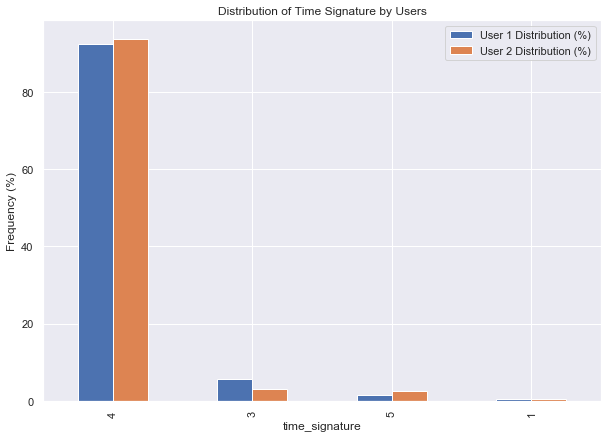

In [16]:
time_sig_1 = pd.DataFrame(user_1['time_signature'].value_counts()).reset_index().rename({'index':'time_signature', 'time_signature':'User 1 Count'}, axis=1)
time_sig_1['User 1 Distribution (%)'] = round(time_sig_1['User 1 Count'] / np.sum(time_sig_1['User 1 Count'])*100, 2)

time_sig_2 = pd.DataFrame(user_2['time_signature'].value_counts()).reset_index().rename({'index':'time_signature', 'time_signature':'User 2 Count'}, axis=1)
time_sig_2['User 2 Distribution (%)'] = round(time_sig_2['User 2 Count'] / np.sum(time_sig_2['User 2 Count'])*100, 2)

time_sig = time_sig_1.merge(time_sig_2, how='left', on='time_signature')
sns.set()
fig1 = time_sig.plot(kind='bar', x='time_signature', y=['User 1 Distribution (%)', 'User 2 Distribution (%)'], title='Distribution of Time Signature by Users', figsize=(10, 7));
fig1.set_ylabel('Frequency (%)');

Following my assumption, the most common time signature is 4/4. User 1 listens to more tracks in triple meter, which could be jazz or classical music, but I also think some hip hop tracks could be considered 3/4 or 6/8 if the beat is in triplets. 

What draws my attention is the 5 and 1 time signatures. Let's have a look at some of these tracks.

In [17]:
user_2[user_2['time_signature'] == 5].head()

track_id                       track_name  \
68   2I9foKseoFQh07p6sD2voE            Many Men (Wish Death)   
76   1FKFCvi0i46qEJLZSEBH8p                      I Get Money   
84   3KSnA0j67IFkiwmEotMGin  Secret (feat. Jeremih & Serani)   
101  5Tuep0cDZI1D54Il9MJdoB                            Trust   
253  0mtcox6ozB0JmWFh2XY5Jx                             Baby   

                            artist_name  \
68                          ['50 Cent']   
76                          ['50 Cent']   
84   ['Burna Boy', 'Jeremih', 'Serani']   
101                     ['Buju Banton']   
253    ['Major Lazer', 'Prince Zimboo']   

                                             artist_id release_date  \
68                          ['3q7HBObVc0L8jNeTe5Gofh']   2003-02-06   
76                          ['3q7HBObVc0L8jNeTe5Gofh']   2007-01-01   
84   ['3wcj11K77LjEY1PkEazffa', '3KV3p5EY4AvKxOlhGH...   2019-07-25   
101                         ['4wLAjfeqAsV66AocWNcowA']   2019-11-15   
253  ['738wLrAtLtCtFOLvQBXOXp', '0IdMQtN3BFsxymg9oU...   2009-06-16   

    album_type  popularity  danceability  energy  key  loudness  mode  \
68       album          63         0.653   0.826    6    -2.930     0   
76       album          52         0.525   0.933    9    -4.673     1   
84       album          65         0.504   0.919    1    -3.695     1   
101     single          55         0.618   0.622   11    -7.050     0   
253      album          21         0.573   0.815    2    -8.293     1   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
68         0.354        0.0153          0.001460     0.131    0.416  108.520   
76         0.356        0.1590          0.000241     0.311    0.457  122.631   
84         0.100        0.2210          0.000047     0.104    0.618  136.374   
101        0.312        0.1260          0.000000     0.532    0.312  114.017   
253        0.881        0.6680          0.000000     0.918    0.732  106.961   

     duration_ms  time_signature  
68        256227               5  
76        223720               5  
84        203538               5  
101       185733               5  
253        77187               5

In [18]:
user_2[user_2['time_signature'] == 1].head()

track_id  \
139  0RLLvYBopDwooCyvnTwgYu   
168  1m8WpLYXEiNVZchsWEcCSy   
501  0UPBidRYcgJ2mjZlk08V8x   
763  3eze1OsZ1rqeXkKStNfTmi   
781  2ohegz9maxzroKBu9YhcCM   

                                            track_name  \
139                                                F.N   
168  Come Through and Chill (feat. J. Cole & Salaam...   
501                                                F.N   
763            Juke Jam (feat. Justin Bieber & Towkio)   
781                                        Pilot Jones   

                                          artist_name  \
139                                      ['Lil Tjay']   
168              ['Miguel', 'J. Cole', 'Salaam Remi']   
501                                      ['Lil Tjay']   
763  ['Chance the Rapper', 'Justin Bieber', 'Towkio']   
781                                   ['Frank Ocean']   

                                             artist_id release_date  \
139                         ['6jGMq4yGs7aQzuGsMgVgZR']   2019-10-11   
168  ['360IAlyVv4PCEVjgyMZrxK', '6l3HvQ5sa6mXTsMTB1...   2017-12-01   
501                         ['6jGMq4yGs7aQzuGsMgVgZR']   2019-08-09   
763  ['1anyVhU62p31KFi8MEzkbf', '1uNFoZAHBGtllmzznp...   2016-05-27   
781                         ['2h93pZq0e7k5yf4dywlkpM']   2012-01-01   

    album_type  popularity  danceability  energy  key  loudness  mode  \
139      album          82         0.567   0.515    6   -10.265     0   
168      album          70         0.461   0.653    6    -8.617     1   
501     single          70         0.562   0.502    6   -10.269     0   
763      album          69         0.505   0.397    5    -9.349     1   
781      album          57         0.394   0.433    8   -13.473     1   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
139        0.247         0.354          0.000000    0.0780    0.321  120.100   
168        0.327         0.158          0.000000    0.1970    0.588   81.628   
501        0.255         0.323          0.000000    0.0757    0.322  120.104   
763        0.324         0.716          0.000000    0.0853    0.558   95.063   
781        0.374         0.485          0.000078    0.8170    0.394  118.988   

     duration_ms  time_signature  
139       224000               1  
168       322000               1  
501       224000               1  
763       219683               1  
781       184080               1

Listening to some of these tracks, it appears like the 5 time signature is caused by a lot of syncopation - displacemenet of regular metrical accents in music. The 1-time signature similarly, has ambigous kick drums, although they're definitely written in either 4/4, 3/4 or 6/8. As these account to only a few samples, we'll keep them for now. 

#### Key Signature
We can also perform a similar analysis on the key signature. The dataset uses standard pitch class notation which we can convert to alphabetical keys for easy synthesis.

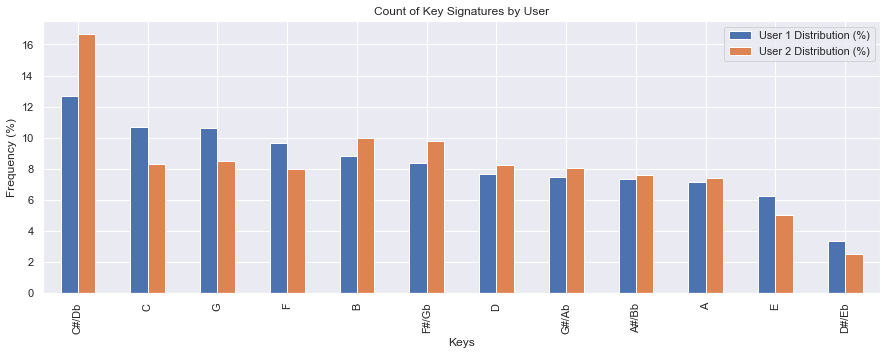

In [19]:
key_count_1 = pd.DataFrame(user_1['key'].value_counts().sort_index()).rename({'key':'User 1 Count'}, axis=1)
keys = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']
key_count_1['Keys'] = keys
key_count_1['User 1 Distribution (%)'] = round(key_count_1['User 1 Count'] / np.sum(key_count_1['User 1 Count'])*100, 2)
key_count_2 = pd.DataFrame(user_2['key'].value_counts().sort_index()).rename({'key':'User 2 Count'}, axis=1)
key_count_2['Keys'] = keys
key_count_1['User 2 Distribution (%)'] = round(key_count_2['User 2 Count'] / np.sum(key_count_2['User 2 Count'])*100, 2)

key_counts = key_count_1.merge(key_count_2, how='left', on='Keys')

sns.set()
fig2 = key_counts.sort_values(by='User 1 Distribution (%)', ascending=False).plot(kind='bar', x='Keys', y=['User 1 Distribution (%)', 'User 2 Distribution (%)'], title='Count of Key Signatures by User', figsize=(15, 5)) 
fig2.set_ylabel('Frequency (%)');

It's difficult to determine the 'type' of music one listens to with just the key signature. However, there's definitely a distribution we can observe between the two users. User 1 has a higher distribution of tracks in root/white keys on the piano, specifically C, E and G. User 2 on the otherhand, listens to music with a lot of accidentals (sharps and flats), in the key of C#/Db, D#/Eb and F#/Gb - which are the black keys on a piano. 

What draws my interest is how some of these key signatures could be in it's relative minor. For example, C-Major could be a-minor, or G-Major could be e-minor - this would differentiate a lot of the 'mood' or genre the music conveys.

#### Tempo
Looking into the difference in tempo (beats per minute) may provide us with an insight into the genre of music both users enjoy listening to. 

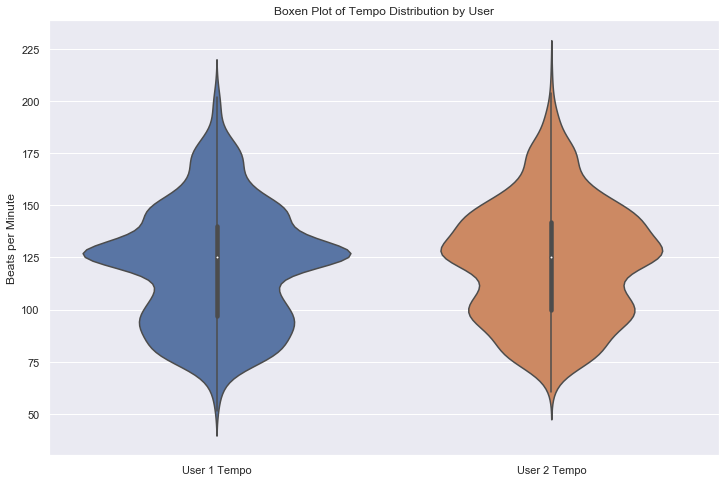

In [20]:
tempos = pd.DataFrame({
    'User 1 Tempo': user_1['tempo'],
    'User 2 Tempo': user_2['tempo']})

plt.figure(figsize=(12, 8))
fig3 = sns.violinplot(data=tempos).set_title('Boxen Plot of Tempo Distribution by User')
plt.ylabel('Beats per Minute');

The figure above suggests that both user 1 and user 2 frequently listen to music around the 125-128 BPM mark, a common tempo for house and electronic dance music. User 2 however, shows a more diverse probability distribution than user 1, although the median value is very similar. Nonetheless, the interquartile range for both users is very similar. 

#### Popularity
We can briefly identify the average popularity of tracks both users have saved into their playlists. From Spotify's API, the popularity value is the closest representation of the number of streams a song has, as they do not reveal stream count in their open source data. Generally speaking, songs that are popular and streamed frequently now, have a higher popularity value than songs that were once popular - therefore, it takes into account how recent the streams are.  

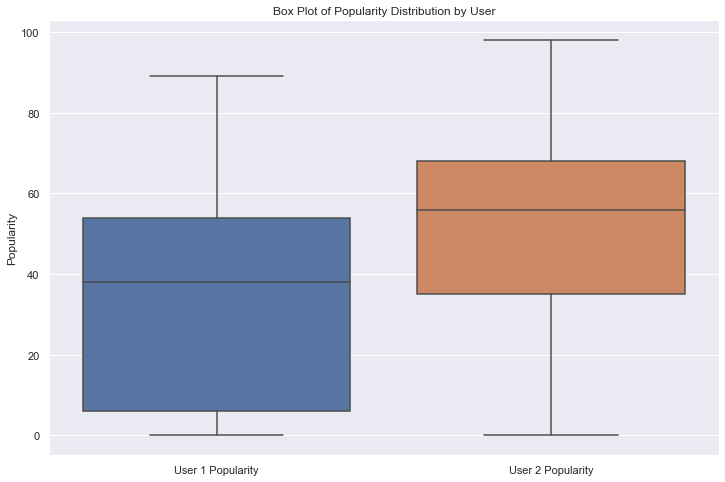

In [21]:
popularities = pd.DataFrame({
    'User 1 Popularity': user_1['popularity'], 
    'User 2 Popularity': user_2['popularity']
})

plt.figure(figsize=(12, 8))
fig4 = sns.boxplot(data=popularities).set_title('Box Plot of Popularity Distribution by User')
plt.ylabel('Popularity');

This boxplot clearly suggests that User 1, in terms of popularity, listens to a wider variety, and much less popular music.  The interquartile range is skewed towards the lower popularity index. On the otherhand, User 2 listens to a less diverse range of music, and songs that are much more popular - aka streamed more frequently.

#### Loudness/Volume
Spotify's API records a feature called loudness, which is the average volume (in decibels) of a track. It represents the psychological correlate of the amplitude of a sound wave. The decibel values are negative as zero dB represents the point at which clipping occurs; essentially the max volume where the sinusoidal wave becomes a square wave. In music, the closer the dB is zero, the more distorted the sound can be. 

Let's compare both users.

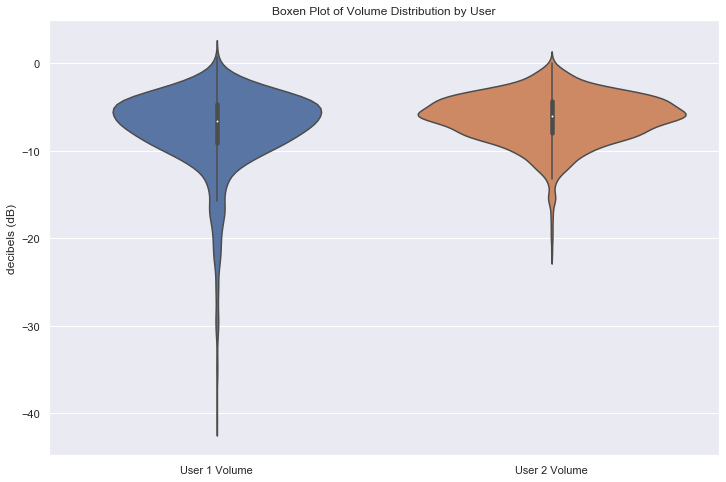

In [22]:
volume = pd.DataFrame({
    'User 1 Volume': user_1['loudness'],
    'User 2 Volume': user_2['loudness']})

plt.figure(figsize=(12, 8))
fig6 = sns.violinplot(data=volume).set_title('Boxen Plot of Volume Distribution by User')
plt.ylabel('decibels (dB)');

Clearly, User 1's music taste has more diversity, with a long tail of outliers at very low decibels. We could infer that these tracks are quiet and calm. User 2's music is more focused right below 0dB - which I think is normal for most mastered records (sound engineers typicallhy maximize the amplitude without it reaching the clipping point).

### Audio Features
Let's deep dive into the audio features, specifically the columns: danceability, energy, speechiness, acousticness, instrumentalness, liveness and valence as these all fall in the numerical range of 0 and 1.

We can begin by comparing the mean:

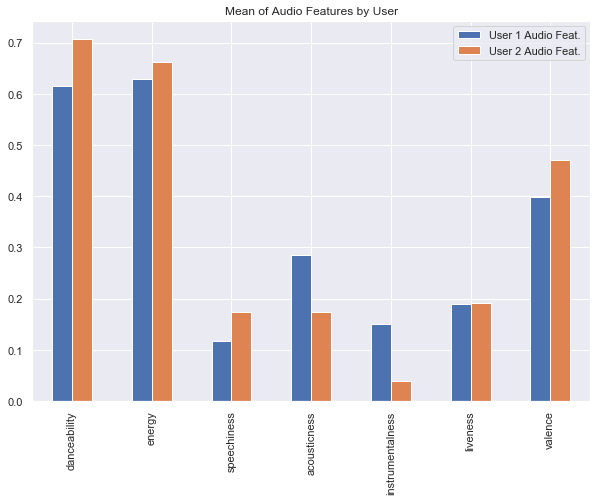

In [23]:
audio_feat_list = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
audio_feat_1 = user_1[audio_feat_list].mean()
audio_feat_2 = user_2[audio_feat_list].mean()

audio_feats = pd.DataFrame({
    'User 1 Audio Feat.': audio_feat_1,
    'User 2 Audio Feat.' : audio_feat_2
})

audio_feats.plot(kind='bar', figsize=(10, 7), title='Mean of Audio Features by User');

In [24]:
#plot radar chart using plotly
categories = audio_feats['User 1 Audio Feat.'].index.tolist()
fig5 = go.Figure()

fig5.add_trace(go.Scatterpolar(
    r=audio_feats['User 1 Audio Feat.'],
    theta=categories,
    fill='toself',
    name='User 1 Audio Feat.'))

fig5.add_trace(go.Scatterpolar(
    r=audio_feats['User 2 Audio Feat.'],
    theta=categories,
    fill='toself',
    name='User 2 Audio Feat.'))

fig5.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            )))

fig5.show(config={'staticPlot': True})

From the figures above, it's clear that User 2 listens to music that is energetic, danceable and positive. This is very clear if we look at the valence - the musical positiveness conveyed by a track. It's also interesting to see that User 1 listens to music that has higher instrumentalness and acousticness. According to Spotify's API documentation, lower instrumentalness and higher speechiness indicates rap or spoken words. This suggests that User 2 listens to a lot more hip-hop and rap music than User 1.

We can compare the mean of the audio features by subtracting User 2 from User 1.

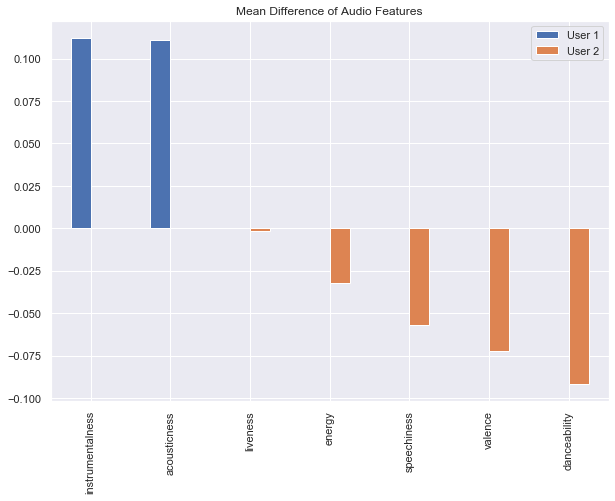

In [25]:
mean_diff = audio_feat_1 - audio_feat_2
audio_feat_diff = pd.DataFrame({
    'User 1' : np.where(mean_diff > 0, mean_diff, 0),
    'User 2' : np.where(mean_diff <= 0, mean_diff, 0)
    }).set_index(mean_diff.index)
fig7 = audio_feat_diff.sort_values(['User 1', 'User 2'], ascending=False).plot(kind='bar', title='Mean Difference of Audio Features',
                                                    figsize=(10,7));


Evidently, User 1's music is much more instrumental and acoustic. User 2's music is more danceable and positive (valence).

#### Feature Diversity between Users
Both users assumingly listen to a variety of genres, from hip-hop, pop, rock, etc. We could look into the standard devition to measure diversity. 

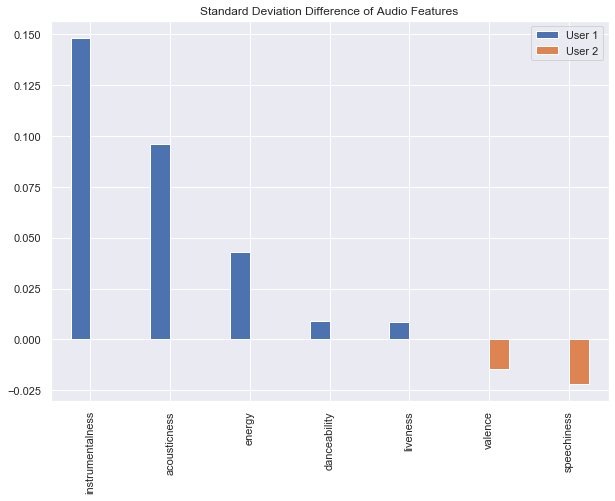

In [26]:
std_diff = user_1[categories].std() - user_2[categories].std()
audio_feat_std_diff = pd.DataFrame({
    'User 1' : np.where(std_diff > 0, std_diff, 0),
    'User 2' : np.where(std_diff <= 0, std_diff, 0)
    }).set_index(mean_diff.index)
fig8 = audio_feat_std_diff.sort_values(['User 1', 'User 2'], ascending=False).plot(kind='bar', title='Standard Deviation Difference of Audio Features',
                                                    figsize=(10,7));


The figure above displays User 1 has greater variety (standard deviation) for instrumentalness, accousticness, energy, danceability and liveness. On the otherhand, User 2 has greater variety in terms of valence and speechiness. This follows our prior analysis that User 1 enjoys more diverse music. 

### Feature Comparisons

We could look into the correltaion of these features by mapping out a heatmap.

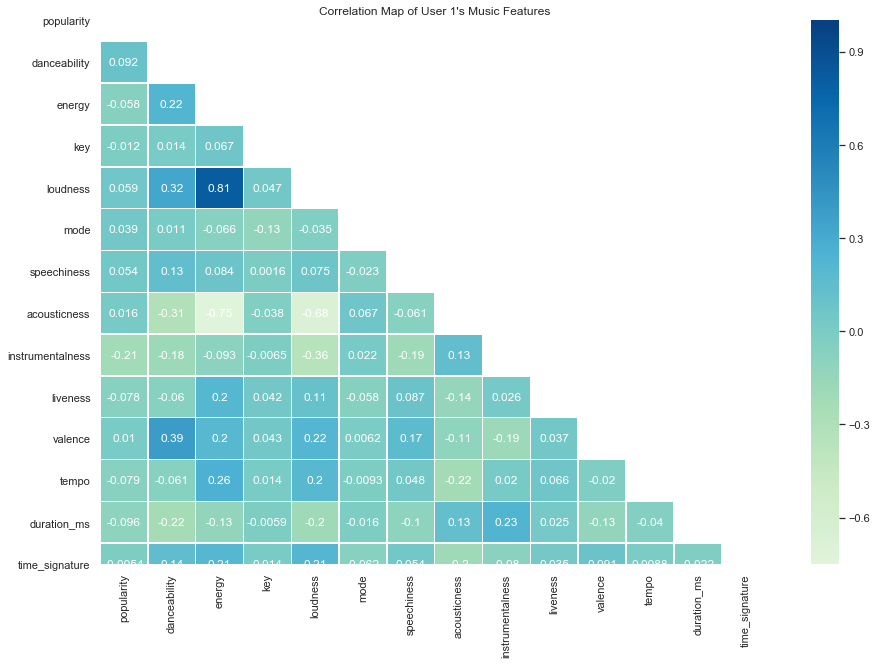

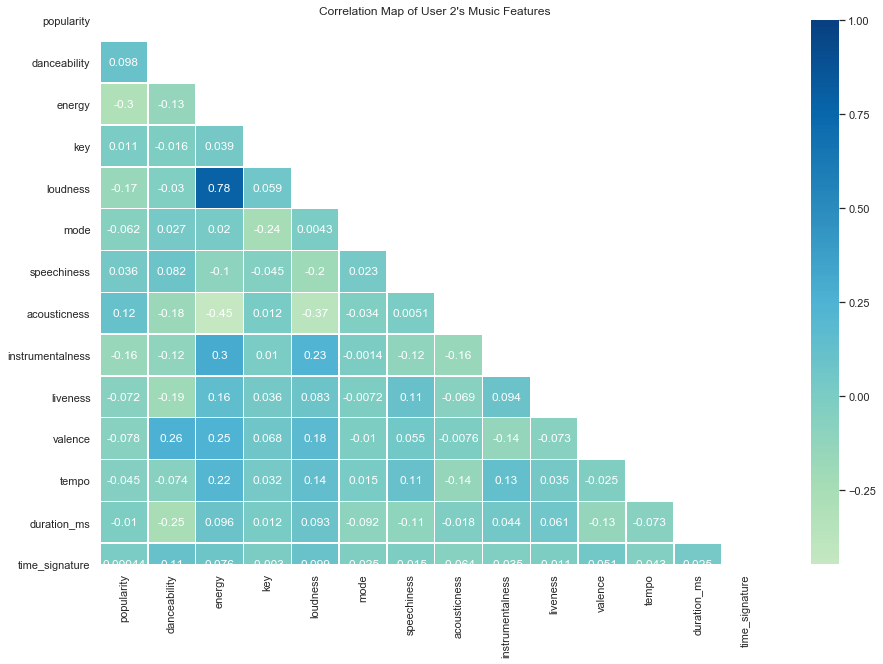

In [27]:
user_1_corr = user_1.corr()
user_2_corr = user_2.corr()

sns.set(style='white')
mask_1 = np.triu(user_1_corr)
plt.figure(figsize=(15, 10))
fig8 = sns.heatmap(user_1_corr, mask=mask_1, cmap='GnBu', center=0, linewidth=.5, annot=True, annot_kws={'size':12, 'color':'white'})
fig8.set_title("Correlation Map of User 1's Music Features");

mask_2 = np.triu(user_2_corr)
plt.figure(figsize=(15, 10))
fig9 = sns.heatmap(user_2_corr, mask=mask_2, cmap='GnBu', center=0, linewidth=.5, annot=True, annot_kws={'size':12, 'color':'white'})
fig9.set_title("Correlation Map of User 2's Music Features");

sns.set()

From the correlation maps, we can infer that Loudness and Energy are highly correlated in both datasets. 

There seems to be a slight correlation in Loudness and Danceability for User 1, as well as Valence and Danceability.

Let's plot these relationships.

#### Loudness and Energy

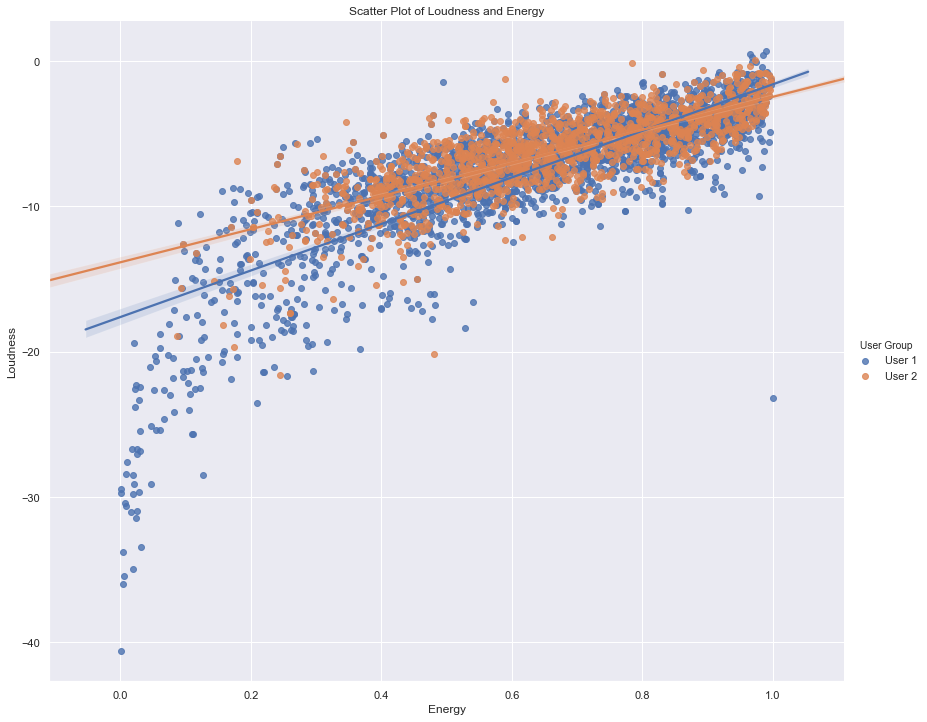

In [28]:
loud_x_energy = pd.DataFrame({
    'Loudness' : pd.concat([user_1['loudness'], user_2['loudness']], ignore_index=True),
    'Energy': pd.concat([user_1['energy'], user_2['energy']], ignore_index=True),
})
loud_x_energy['User Group'] = np.where(loud_x_energy.index < len(user_1.index), 'User 1', 'User 2')
fig10 = sns.lmplot(x='Energy', y='Loudness', data=loud_x_energy, hue='User Group', height=10, aspect=1.2, fit_reg=True)
plt.title('Scatter Plot of Loudness and Energy');

As expected, there's a very strong relationship between loudness and energy. Essentially as volume increases, so too does the energy. This makes sense as most energetic tracks can be associated with high amplitude and volume.

#### Loudness and Danceability

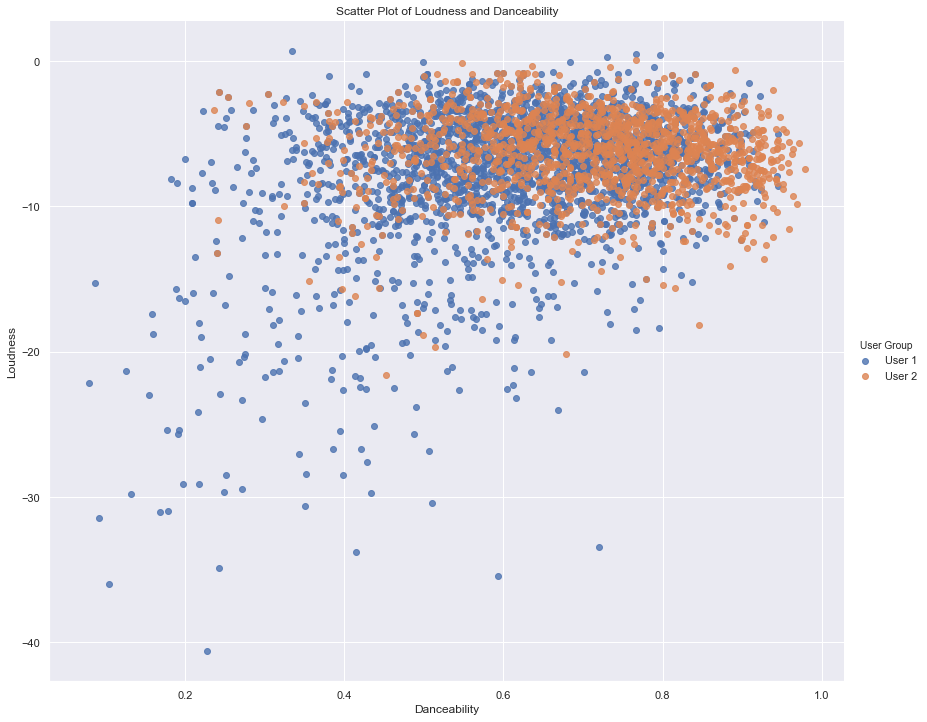

In [29]:
loud_x_dance = pd.DataFrame({
    'Loudness' : pd.concat([user_1['loudness'], user_2['loudness']], ignore_index=True),
    'Danceability': pd.concat([user_1['danceability'], user_2['danceability']], ignore_index=True),
})
loud_x_dance['User Group'] = np.where(loud_x_dance.index < len(user_1.index), 'User 1', 'User 2')
fig11 = sns.lmplot(x='Danceability', y='Loudness', data=loud_x_dance, hue='User Group', height=10, aspect=1.2, fit_reg=False)
plt.title('Scatter Plot of Loudness and Danceability');

There is a slight correlation with the loudness and danceability. As volume increases, so does the danceability - more so for User 1.

#### Valence and Danceability

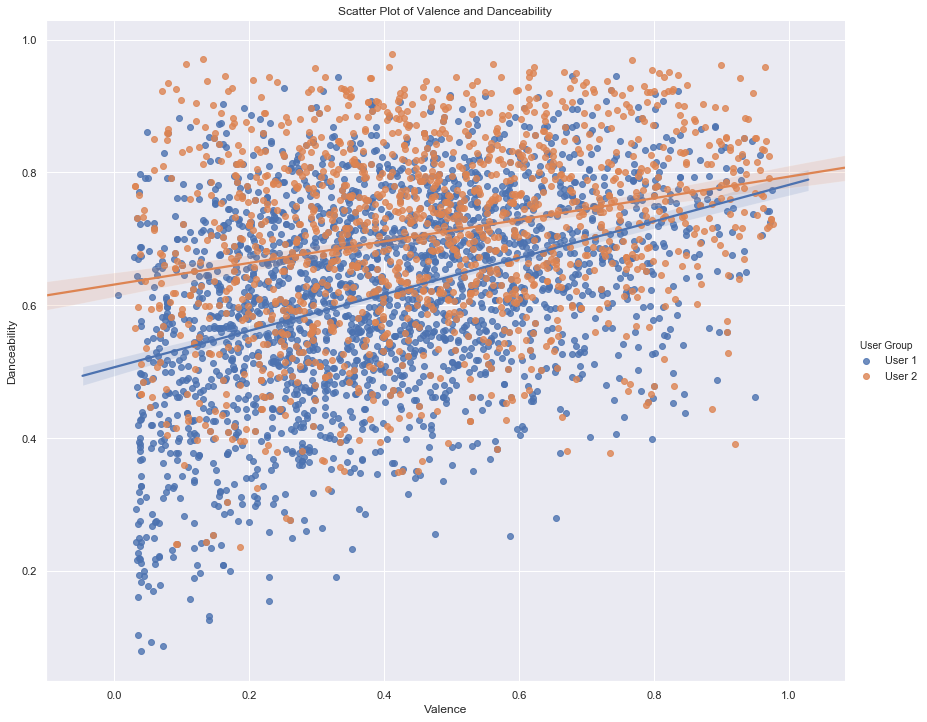

In [30]:
valence_x_dance = pd.DataFrame({
    'Valence' : pd.concat([user_1['valence'], user_2['valence']], ignore_index=True),
    'Danceability': pd.concat([user_1['danceability'], user_2['danceability']], ignore_index=True),
})
valence_x_dance['User Group'] = np.where(valence_x_dance.index < len(user_1.index), 'User 1', 'User 2')
fig12 = sns.lmplot(x='Valence', y='Danceability', data=valence_x_dance, hue='User Group', height=10, aspect=1.2, fit_reg=True)
plt.title('Scatter Plot of Valence and Danceability');

From the heatmap, the correlation for Valence and Danceability is 0.39 for User 1 and 0.26 for User 2. Evidently, User 1 has a slightly stronger relationship between the two features; as valence (positivity of music) increase, so-too does the danceability of the track. This suggests that happy/joyful songs are more danceable than sad songs.

#### Song Release Dates
A column in the dataset is the release date. We could plot a count of when a track was released by month - perhaps, one of the users enjoys older music.

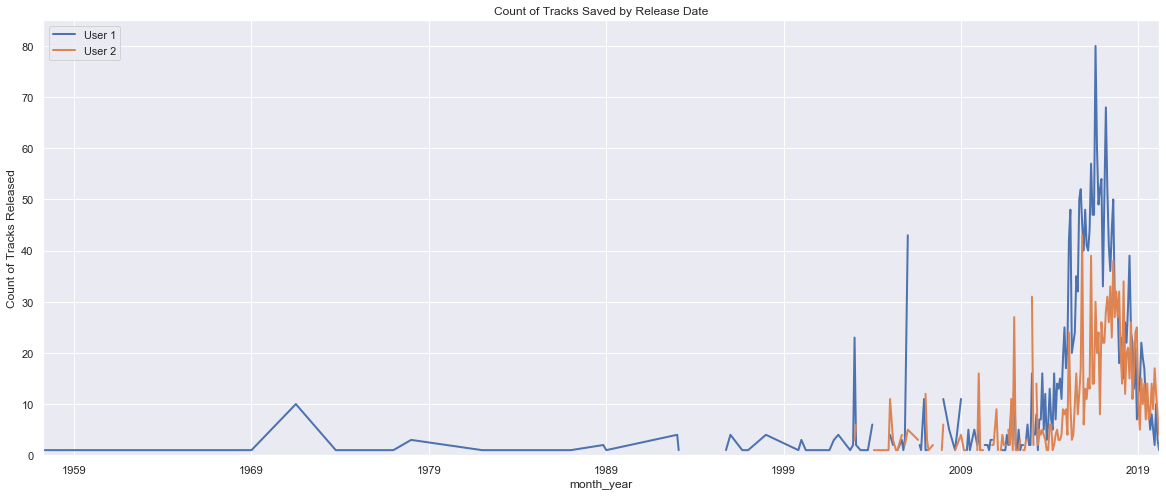

In [31]:
#transform release_date column into datetime
user_1['release_date'] = pd.to_datetime(user_1['release_date'])
user_2['release_date'] = pd.to_datetime(user_2['release_date'])

#create column just for month and year
user_1['month_year'] = user_1['release_date'].dt.to_period('M')
user_2['month_year'] = user_2['release_date'].dt.to_period('M')

month_year = pd.DataFrame({
    'User 1' : user_1.groupby('month_year')['release_date'].count(),
    'User 2' : user_2.groupby('month_year')['release_date'].count()
}).sort_index()

fig13 = month_year.plot(figsize=(20, 8), title='Count of Tracks Saved by Release Date', linewidth=2)
fig13.set_ylabel('Count of Tracks Released')
fig13.set_ylim(0, 85);

Looking at the plot above, it appears that User 1 listens to a lot more older tracks, whereas User 2's music selection ranges from around the year 2000 onwards. User 1's most popular year is around 2016, saving over 80 songs released that year.

#### Release Date and Song Duration
An interesting feature to explore is the length of a song against release date. A trend in the music industry is that songs are getting shorter in duration. This is a direct implication of the economics of streaming music. Essentially, in a streaming world, artists have a financial incentive to record shorter songs. Spotify on average pays out $0.004-0.008 per stream on a pro-rata model, and a single stream is tracked if a user streams at least 30 seconds of it. To optimize payout, they have a greater incentive to record more tracks, not longer tracks.

We can see if this trend holds true by comparing song duration over a datetime plot.

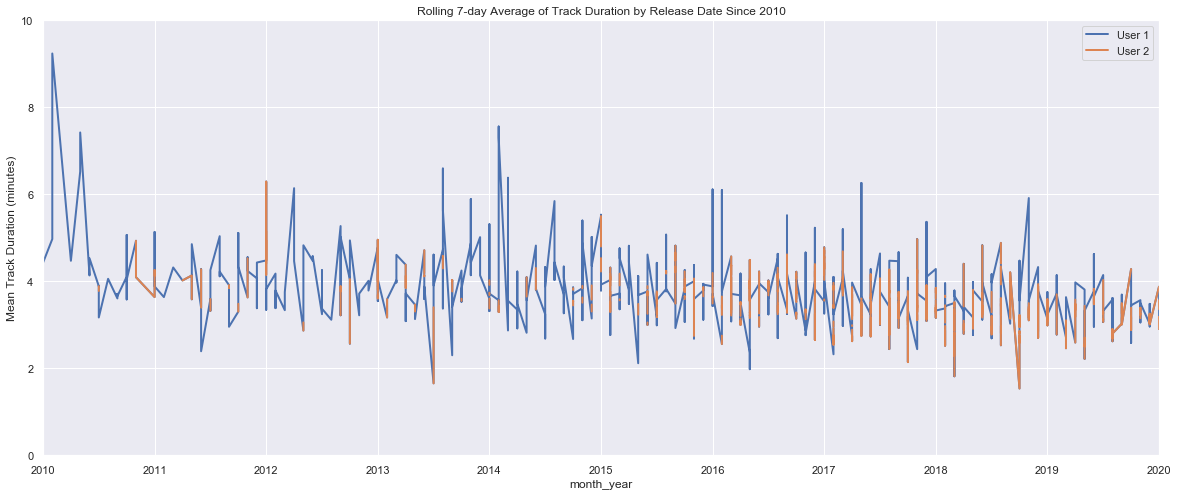

In [32]:
#convert milliseconds to minutes
user_1['duration_min'] = user_1['duration_ms'] / 60000
user_2['duration_min'] = user_2['duration_ms'] / 60000

#create rolling 7-day average to smooth out the spikes
duration_by_date = pd.DataFrame({
    'User 1' : (user_1.groupby('month_year')['duration_min'].rolling(7, min_periods=1).mean()),
    'User 2' : (user_2.groupby('month_year')['duration_min'].rolling(7, min_periods=1).mean())
}).sort_index().reset_index()

#fill in the missing values as not all dates were captured in the data 
duration_by_date = duration_by_date.interpolate('bfill')

fig14 = duration_by_date.plot(x='month_year', y=['User 1', 'User 2'], figsize=(20, 8), title='Rolling 7-day Average of Track Duration by Release Date Since 2010', linewidth=2)
fig14.set_ylabel('Mean Track Duration (minutes)')
fig14.set_ylim(0, 10)
fig14.set_xlim(np.datetime64('2010', 'Y'), np.datetime64('2020', 'Y'));

The figure above definitely suggests that song duration is becoming shorter, even when we observe the past 10 years (there were not enough datapoints prior 2010). We could spend a whole analysis on trends in song duration, but that's for another project. 

#### Next Step ==> Modeling
Exploring every feature of the dataset gives us a better understanding of the relationship of each feature, as well as how they may impact classification of either users. Now, we can move onto preprocessing and engineering our data for modeling